Mercury Orbit and General Relativity

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
Mmercury = 1.651*10**-7

In [ ]:
def Fg(x,y):
  R = x**2+y**2
  Fg = (4*math.pi**2*Mmercury)/R
  return Fg

In [ ]:
def Vo():
  a = Fg(.39,0)/Mmercury
  v = math.sqrt(.39*a)
  return v

Vo()

10.061148632539163

I calculated the initial velocity using the centripital acceleration formula of V^2/r = a to figure out the initial velocity.

In [ ]:
Vo()

10.061148632539163

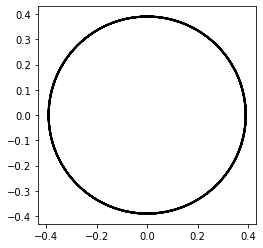

In [ ]:
Vy = [Vo()]
Vx = [0]
X = [.39]
Y = [0]
Ax = [(-Fg(.39,0)/Mmercury)*X[0]/.39**2]
Ay = [(-Fg(.39,0)/Mmercury)*Y[0]/.39**2]

for t in range(24500):
  Vx.append(Vx[len(Vx)-1] + Ax[len(Ax)-1]*.0001)
  Vy.append(Vy[len(Vy)-1] + Ay[len(Ay)-1]*.0001)
  X.append(X[len(X)-1] + Vx[len(Vx)-1]*.0001)
  Y.append(Y[len(Y)-1] + Vy[len(Vy)-1]*.0001)
  Ax.append((-Fg(.39,0)/Mmercury)*X[len(X)-1]/math.sqrt((X[len(X)-1]**2)+(Y[len(Y)-1]**2)))
  Ay.append((-Fg(.39,0)/Mmercury)*Y[len(Y)-1]/math.sqrt((X[len(X)-1]**2)+(Y[len(Y)-1]**2)))

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(X,Y,"k")

ax.set_aspect('equal', adjustable='box')

This calculates the elliptical velocity for Mercury analytically using the vis-viva equation



In [ ]:
def EllipV(x):
  V = 4*math.pi**2*((2/x)-(1/.39))
  return(math.sqrt(V))

EllipV(.47)

8.171080381166023

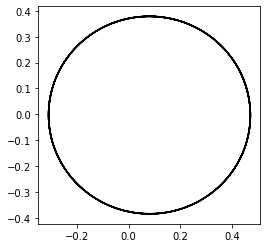

In [ ]:
Vy = [EllipV(.47)]
Vx = [0]

X = [.47]
Y = [0]
Ax = [(-Fg(.47,0)/Mmercury)*X[0]/(.47)]
Ay = [(-Fg(.47,0)/Mmercury)*Y[0]/(.47)]
e = .206

for t in range(1000):
  Vx.append(Vx[len(Vx)-1] + Ax[len(Ax)-1]*.001)
  Vy.append(Vy[len(Vy)-1] + Ay[len(Ay)-1]*.001)
  X.append(X[len(X)-1] + Vx[len(Vx)-1]*.001)
  Y.append(Y[len(Y)-1] + Vy[len(Vy)-1]*.001)
  Ax.append((-Fg(X[len(X)-1],Y[len(Y)-1])/Mmercury)*X[len(X)-1]/math.sqrt((X[len(X)-1]**2)+(Y[len(Y)-1]**2)))
  Ay.append((-Fg(X[len(X)-1],Y[len(Y)-1])/Mmercury)*Y[len(Y)-1]/math.sqrt((X[len(X)-1]**2)+(Y[len(Y)-1]**2)))

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(X,Y,"k")

ax.set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
def Fg(x,y):
  R = x**2+y**2
  Fg = (4*math.pi**2*Mmercury)*(1+.001/R)/R
  return Fg

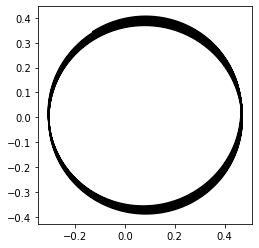

[2.468781909191425, 5.0718133478635, 7.674844800821708, 10.277876289157124, 12.88090783396219, 15.483939456329518, 18.086971177351575]
[2.468781909191425, 5.0718133478635, 7.674844800821708, 10.277876289157124, 12.88090783396219, 15.483939456329518, 18.086971177351575]


In [ ]:
Vy = [EllipV(.47)]
Vx = [0]
Theta = []
X = [.47]
Y = [0]
Ax = [(-Fg(.47,0)/Mmercury)*X[0]/(.47)**2]
Ay = [(-Fg(.47,0)/Mmercury)*Y[0]/(.47)**2]
e = .206
T = []

for t in range(2500):
  Vx.append(Vx[len(Vx)-1] + Ax[len(Ax)-1]*.001)
  Vy.append(Vy[len(Vy)-1] + Ay[len(Ay)-1]*.001)
  X.append(X[len(X)-1] + Vx[len(Vx)-1]*.001)
  Y.append(Y[len(Y)-1] + Vy[len(Vy)-1]*.001)
  Ax.append((-Fg(X[len(X)-1],Y[len(Y)-1])/Mmercury)*X[len(X)-1]/math.sqrt((X[len(X)-1]**2)+(Y[len(Y)-1]**2)))
  Ay.append((-Fg(X[len(X)-1],Y[len(Y)-1])/Mmercury)*Y[len(Y)-1]/math.sqrt((X[len(X)-1]**2)+(Y[len(Y)-1]**2)))
  if(len(X) > 2):
    if(X[len(X)-3]**2 + Y[len(Y)-3]**2 < X[len(X)-2]**2 + Y[len(Y)-2]**2 and X[len(X)-1]**2 + Y[len(Y)-1]**2 < X[len(X)-2]**2 + Y[len(Y)-2]**2 and math.sqrt(X[len(X)-2]**2 + Y[len(Y)-2]**2) >= .47):
      if(math.atan2(Y[len(Y)-2],X[len(X)-2])*180/math.pi < 0):
        Theta.append(math.atan2(Y[len(Y)-2],X[len(X)-2])*180/math.pi + 360)
        T.append(t*.001)
      else:
        Theta.append(math.atan2(Y[len(Y)-2],X[len(X)-2])*180/math.pi)
        T.append(t*.001)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(X,Y,"k")

ax.set_aspect('equal', adjustable='box')
plt.show()
Theta.pop(0)
T.pop(0)
Theta.pop(0)
T.pop(0)
Theta.pop(0)
T.pop(0)
print(Theta)
print(Theta)

10.712063940998378


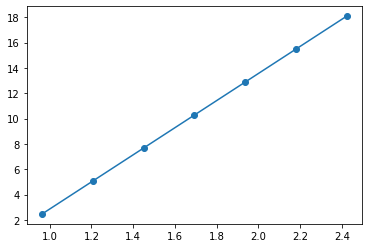

In [ ]:
a, b = np.polyfit(T,Theta,1)
plt.scatter(T,Theta)
Fit = []
for i in T:
  Fit.append(a*i+b)
plt.plot(T, Fit)

print(a)

In [ ]:
def Fg(x,y):
  R = x**2+y**2
  Fg = (4*math.pi**2*Mmercury)*(1+.002/R)/R
  return Fg

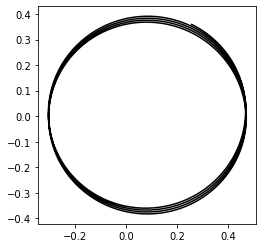

[2.505350638244515, 7.729754945551997, 13.945587091014122]
[2.505350638244515, 7.729754945551997, 13.945587091014122]


In [ ]:
Vy = [EllipV(.47)]
Vx = [0]
Theta = []
X = [.47]
Y = [0]
Ax = [(-Fg(.47,0)/Mmercury)*X[0]/(.47)**2]
Ay = [(-Fg(.47,0)/Mmercury)*Y[0]/(.47)**2]
e = .206
T = []

for t in range(1000):
  Vx.append(Vx[len(Vx)-1] + Ax[len(Ax)-1]*.001)
  Vy.append(Vy[len(Vy)-1] + Ay[len(Ay)-1]*.001)
  X.append(X[len(X)-1] + Vx[len(Vx)-1]*.001)
  Y.append(Y[len(Y)-1] + Vy[len(Vy)-1]*.001)
  Ax.append((-Fg(X[len(X)-1],Y[len(Y)-1])/Mmercury)*X[len(X)-1]/math.sqrt((X[len(X)-1]**2)+(Y[len(Y)-1]**2)))
  Ay.append((-Fg(X[len(X)-1],Y[len(Y)-1])/Mmercury)*Y[len(Y)-1]/math.sqrt((X[len(X)-1]**2)+(Y[len(Y)-1]**2)))
  if(len(X) > 2):
    if(X[len(X)-3]**2 + Y[len(Y)-3]**2 < X[len(X)-2]**2 + Y[len(Y)-2]**2 and X[len(X)-1]**2 + Y[len(Y)-1]**2 < X[len(X)-2]**2 + Y[len(Y)-2]**2 and math.sqrt(X[len(X)-2]**2 + Y[len(Y)-2]**2) >= .47):
      if(math.atan2(Y[len(Y)-2],X[len(X)-2])*180/math.pi < 0):
        Theta.append(math.atan2(Y[len(Y)-2],X[len(X)-2])*180/math.pi + 360)
      else:
        Theta.append(math.atan2(Y[len(Y)-2],X[len(X)-2])*180/math.pi)
      T.append(t*.001)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(X,Y,"k")

ax.set_aspect('equal', adjustable='box')
plt.show()
Theta.pop(0)
T.pop(0)
print(Theta)
print(Theta)

23.589487904672858


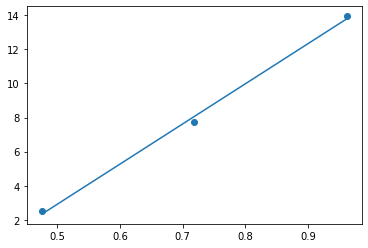

In [ ]:
a2, b = np.polyfit(T,Theta,1)
plt.scatter(T,Theta)
Fit = []
for i in T:
  Fit.append(a2*i+b)
plt.plot(T, Fit)

print(a2)

In [ ]:
def Fg(x,y):
  R = x**2+y**2
  Fg = (4*math.pi**2*Mmercury)/R*(1+(.0001/R))
  return Fg

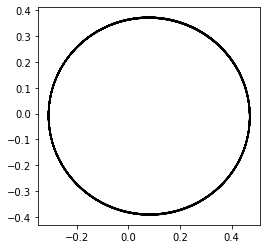

[353.00991693875255, 353.42931600671847, 353.84871305065315, 354.2681100187139, 354.68750885905683]
[353.00991693875255, 353.42931600671847, 353.84871305065315, 354.2681100187139, 354.68750885905683]


In [ ]:
Vy = [EllipV(.47)]
Vx = [0]
Theta = []
X = [.47]
Y = [0]
Ax = [(-Fg(.47,0)/Mmercury)*X[0]/(.47)**2]
Ay = [(-Fg(.47,0)/Mmercury)*Y[0]/(.47)**2]
e = .206
T = []

for t in range(2800):
  Vx.append(Vx[len(Vx)-1] + Ax[len(Ax)-1]*.001)
  Vy.append(Vy[len(Vy)-1] + Ay[len(Ay)-1]*.001)
  X.append(X[len(X)-1] + Vx[len(Vx)-1]*.001)
  Y.append(Y[len(Y)-1] + Vy[len(Vy)-1]*.001)
  Ax.append((-Fg(X[len(X)-1],Y[len(Y)-1])/Mmercury)*X[len(X)-1]/math.sqrt((X[len(X)-1]**2)+(Y[len(Y)-1]**2)))
  Ay.append((-Fg(X[len(X)-1],Y[len(Y)-1])/Mmercury)*Y[len(Y)-1]/math.sqrt((X[len(X)-1]**2)+(Y[len(Y)-1]**2)))
  if(len(X) > 2):
    if(X[len(X)-3]**2 + Y[len(Y)-3]**2 < X[len(X)-2]**2 + Y[len(Y)-2]**2 and X[len(X)-1]**2 + Y[len(Y)-1]**2 < X[len(X)-2]**2 + Y[len(Y)-2]**2 and math.sqrt(X[len(X)-2]**2 + Y[len(Y)-2]**2) >= .47):
      if(math.atan2(Y[len(Y)-2],X[len(X)-2])*180/math.pi < 0):
        Theta.append(math.atan2(Y[len(Y)-2],X[len(X)-2])*180/math.pi + 360)
      else:
        Theta.append(math.atan2(Y[len(Y)-2],X[len(X)-2])*180/math.pi)
      T.append(t*.001)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(X,Y,"k")

ax.set_aspect('equal', adjustable='box')
plt.show()

Theta.pop(0)
T.pop(0)
Theta.pop(0)
T.pop(0)
Theta.pop(0)
T.pop(0)
Theta.pop(0)
T.pop(0)

Theta.pop(0)
T.pop(0)
Theta.pop(0)
T.pop(0)
print(Theta)
print(Theta)

1.7188433822146654


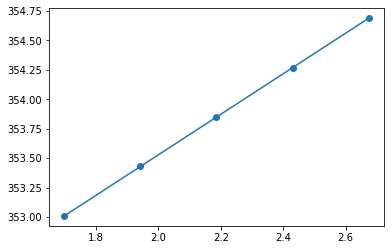

In [ ]:
a3, b = np.polyfit(T,Theta,1)
plt.scatter(T,Theta)
Fit = []
for i in T:
  Fit.append(a3*i+b)
plt.plot(T, Fit)

print(a3)

0.45682872021149734


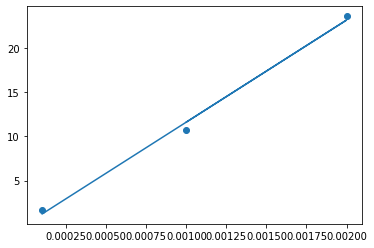

In [ ]:
Alpha = [.001, .002, .0001]
dTheta = [a, a2, a3]
c, b = np.polyfit(Alpha, dTheta,1)
plt.scatter(Alpha, dTheta)
Theta = []
for i in Alpha:
  Theta.append(c*i+b)

plt.plot(Alpha, Theta)

print(c*1.1*(10**-8)*3600)



My final Answer ends up being 45.6 arcyears/century. The error percentage for this is approximately 6% which is acceptable. However, I think that could have been accounted for the initial velocity was more accurate and in some other areas of my calculation including my timestep